In [1]:
import numpy as np
import os 
from functions import*
from ebr_file import load_ebr_file
#LDA
from scipy.io import savemat

In [14]:
file_path = 'C:/Users/VictorCJ/OneDrive/Escritorio/NEURO/Sujetos'
subjects = np.arange(1,2)
for subject in subjects:
##################################### Pre-processing #####################################
    NeuroData=load_ebr_file(file_path +'/Sujeto' + str(subject) + '.ebr')
    EEGdata,Marks=getEEG(NeuroData['data'])
    Channels = np.delete(np.array(NeuroData['channels']), np.array(range(8,10)))
    EEGsignal=cutSignal(EEGdata,1,15,256)
    EEGfilter=bandpassfilter(EEGsignal,1,40,256)
    Validation=Validationmatrix(EEGfilter)
    EEGclean, Marksclean=cleaner(Validation,EEGfilter,Marks)
##################################### Windowing #####################################
    Cross=generatewindows(EEGclean,0,4,4)
    Move=generatewindows(EEGclean,4,14,10)
    Left,Right=movements(EEGclean,4,14,10,Marksclean)

##################################### Set EEGnet data #####################################
    ######## Cases ########
    X1,Y1=setEEGnet(Cross,Move)
    X2,Y2=setEEGnet(Cross,Left)
    X3,Y3=setEEGnet(Cross,Right)
    X4,Y4=setEEGnet(Left,Right)
    ########Cross vs Move########
    f_x1 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_X1.mat"
    f_y1 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_y1.mat"
    savemat(f_x1, {"array": X1})
    savemat(f_y1, {"array": Y1})
    ########Cross vs Left########
    f_x2 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_X2.mat"
    f_y2 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_y2.mat"
    savemat(f_x2, {"array": X2})
    savemat(f_y2, {"array": Y2})
    ########Cross vs Right########
    f_x3 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_X3.mat"
    f_y3 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_y3.mat"
    savemat(f_x3, {"array": X3})
    savemat(f_y3, {"array": Y3})
    ########Left vs Right########
    f_x4 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_X4.mat"
    f_y4 = file_path +'/EEGnet/S'+str(subject) +'/'+"S" + str(subject) + "_y4.mat"
    savemat(f_x4, {"array": X4})
    savemat(f_y4, {"array": Y4})



Plot results

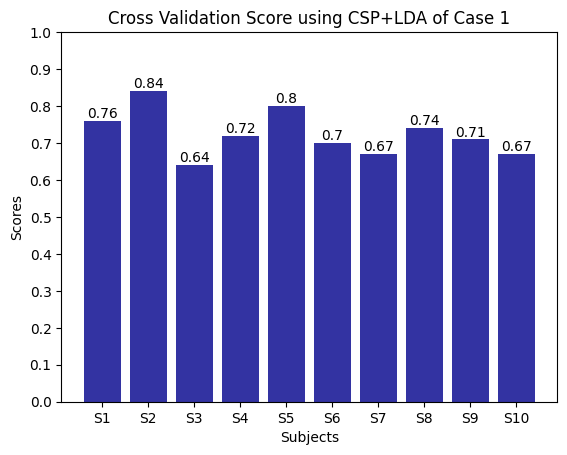

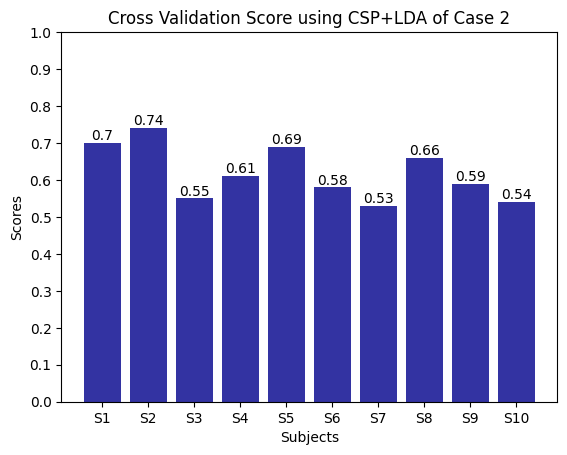

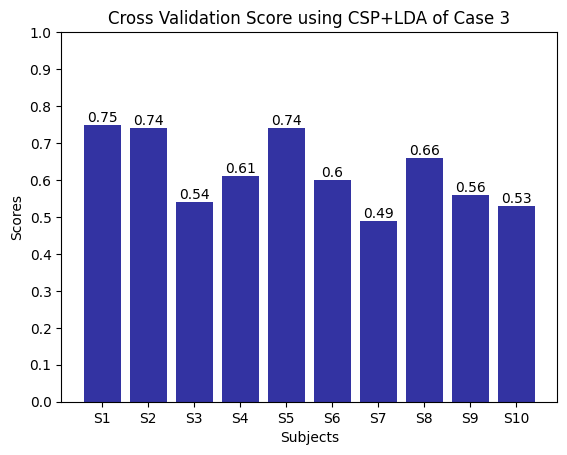

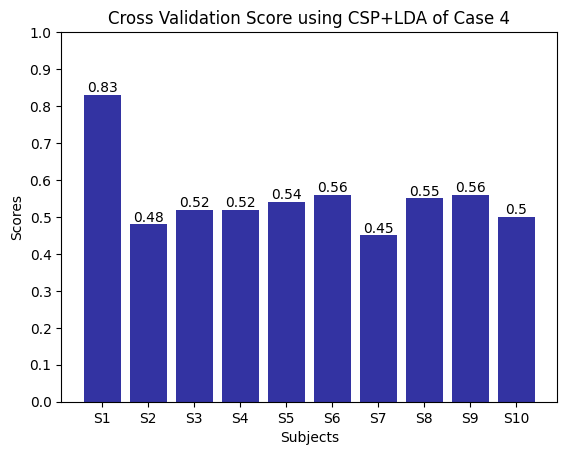

In [29]:
file_path = 'C:/Users/VictorCJ/OneDrive/Escritorio/NEURO/Sujetos'
# Select the subjects to plot, as an arange
subjects = np.arange(1,11)
cases=np.arange(1,5)
# Load the values
#########################################
accuracies = np.zeros((1,2)) # Initialize the accuracies

for case in cases: # Run for every subject in the arange
  accuracies = np.zeros((1,2)) # Initialize the accuracies
  for subject in subjects: 
    # Load the accuracy and std of the subject
    subject_accuracy = np.load(file_path + '/EEGnet/Results'+'/S' +str(subject)+'/'+'ACC_S' + str(subject) + 'C'+str(case)+'.npy')
    #subject_accuracy = np.load(file_path + '/CSP/S'+ str(subject)+'/'+'/Results/'+'ACC_S' + str(subject) + 'C1'+'.npy')
    subject_accuracy=np.round(subject_accuracy,2)
    # Append the values to a bigger vector
    accuracies = np.vstack((accuracies, subject_accuracy))

  # Eliminate the first empty row
  accuracies = accuracies[1:,:]
  ##########################################
  # Make the  figure
  #####################################
  x = np.arange(1,len(accuracies) + 1) # Set the x-axis
  width = 0.8# Set the width of the bars
  # initialize the figure
  fig, ax = plt.subplots()
  # Plot the values
  Bars = ax.bar(x, accuracies[:,0].tolist(), alpha=0.8, capsize=4, color = 'darkblue', width = width)
  # Set the properties of the figure (title, axis names, etc...)
  ax.set_ylabel('Scores')
  ax.set_xlabel('Subjects')
  ax.bar_label(Bars)
  #ax.set_title('Accuracy subject S'+ str(subject)+' Case '+str(case) +' with CSP+LDA'  , fontsize=18)
  ax.set_title('Cross Validation Score using CSP+LDA'+' of Case '+str(case))
  ax.set_xticks(x)
  xnames=('S1','S2','S3','S4','S5','S6','S7','S8','S9','S10')
  plt.yticks(np.arange(0, 1.1, 0.1))
  plt.xticks(x,xnames)
  #####################################3

  # Save the figure
  #plt.savefig(file_path + 'Plots/ACC_' + '_2.pdf', dpi=100, bbox_inches="tight")

  # Show the figure as output
  plt.show()

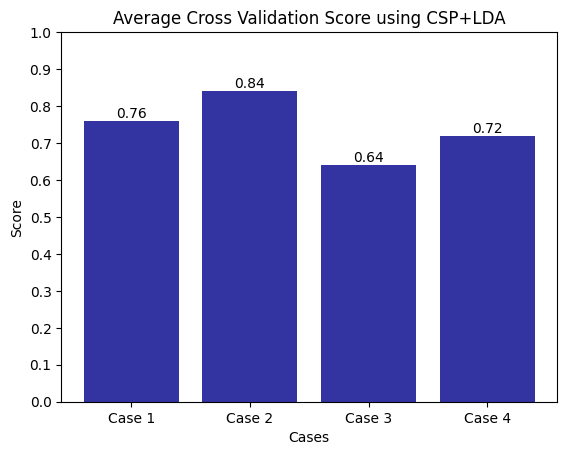

In [34]:
file_path = 'C:/Users/VictorCJ/OneDrive/Escritorio/NEURO/Sujetos'
# Select the subjects to plot, as an arange
subjects = np.arange(1,11)
cases=np.arange(1,5)
# Load the values
#########################################
accuracies = np.zeros((1,1)) # Initialize the accuracies
accuracies_subj=np.zeros((1,2))
for case in cases: # Run for every subject in the arange
  #accuracies = np.zeros((1,1)) # Initialize the accuracies
  for subject in subjects: 
    # Load the accuracy and std of the subject
    subject_accuracy = np.load(file_path + '/EEGnet/Results'+'/S' +str(subject)+'/'+'ACC_S' + str(subject) + 'C'+str(case)+'.npy')
    #subject_accuracy = np.load(file_path + '/CSP/S'+ str(subject)+'/'+'/Results/'+'ACC_S' + str(subject) + 'C1'+'.npy') 
    # Append the values to a bigger vector
    accuracies_subj = np.vstack((accuracies_subj, subject_accuracy))
  #print(accuracies_subj)

  # Eliminate the first empty row
  accuracies_subj = accuracies_subj[1:,:]
  #print(accuracies)
  accuracy_mean=np.mean(accuracies_subj[0][0])
  #print(accuracy_mean)
  accuracy_mean=np.round(accuracy_mean,2)
  #print(accuracy_mean)
  accuracies=np.vstack((accuracies,accuracy_mean))

accuracies= accuracies[1:,:]
##########################################
# Make the  figure
#####################################
x = np.arange(1,len(accuracies) + 1) # Set the x-axis
width = 0.8 # Set the width of the bars
# initialize the figure
fig, ax = plt.subplots()
# Plot the values
Bars = ax.bar(x, accuracies[:,0].tolist(), alpha=0.8, capsize=4, color = 'darkblue', width = width)
# Set the properties of the figure (title, axis names, etc...)
ax.set_ylabel('Score')
ax.set_xlabel('Cases')
#ax.set_title('Accuracy subject S'+ str(subject)+' Case '+str(case) +' with CSP+LDA'  , fontsize=18)
xnames=('Case 1','Case 2','Case 3','Case 4')
ax.bar_label(Bars)
ax.set_title('Average Cross Validation Score using CSP+LDA')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(x,xnames)
#####################################3

# Save the figure
#plt.savefig(file_path + '/CSP/Plots/ACC_' + '_2.png', dpi=100, bbox_inches="tight")

# Show the figure as output
plt.show()